In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [388]:
x = np.linspace(0, 100)
f = lambda x: x
y = f(x)

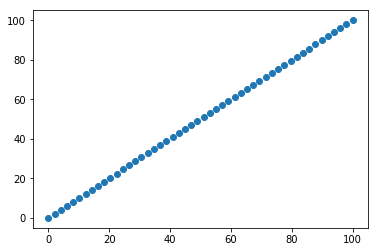

In [389]:
plt.scatter(x, y);

In [390]:
def random_initializer(n, m, seed=None):
    if seed is not None:
        np.random.seed(seed)
    return np.random.randn(n, m) * .01

def zero_initializer(n, m):
    return np.zeros((n, m))

In [391]:
class Linear:
    def __init__(self):
        self.last_input = None
    
    def forward(self, X):
        self.last_input = X
        return X
    
    def backward(self, dY):
        s = self.last_input
        return s * dY
    
    def __repr__(self):
        return 'linear'

class Sigmoid:
    def __init__(self):
        self.last_input = None
    
    def forward(self, X):
        self.last_input = X
        return self._sigmoid(X)
    
    def backward(self, dY):
        s = self._sigmoid(self.last_input)
        return s * (1 - s) * dY
    
    def _sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    def __repr__(self):
        return 'sigmoid'

In [467]:
class Layer:
    def __init__(self, input_dim, output_dim, activation=None):
        """ Linear -> Activation dense layer """
        self.input_dim, self.output_dim = input_dim, output_dim
        self.activation = activation
        self.last_input = None
        
        self.W = random_initializer(output_dim, input_dim)
        self.b = zero_initializer(output_dim, 1)
    
    def forward_propagate(self, X):
        self.last_input = X  # Cache last input
        Z = X @ self.W.T + self.b.T
        self.last_output = Z
        if self.activation:
            return self.activation.forward(Z)
        else:
            return Z

    def backward_propagate(self, dA):
        
        if self.activation:
            dZ = self.activation.backward(dA)
        else:
            dZ = dA
#         print(f"last_input_shape={self.last_input.shape}, dZ.shape={dZ.shape}")
        dW = self.last_input.T @ dZ
        db = np.mean(dZ, axis=0, keepdims=True)
#         print(f"dZ.shape={dZ.shape}, W.shape={self.W.shape}")
        dA = dZ @ self.W
        return dA, dW, db
    
    def __repr__(self):
        return f"{self.activation} # params = {self._n_params()}"
    
    def _n_params(self):
        w = self.W.shape[0] * self.W.shape[1]
        b = self.b.shape[0]
        return w + b

In [468]:
class Optimizer:
    def __init__(self):
        """ Class responsible for training process """
        pass
    

class GradientDescent:
    def __init__(self, learning_rate=.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def update(self, theta, grad):
        return theta - self.learning_rate * grad

In [469]:
class MSE:
    def forward(self, Y, Y_pred):
        return np.sum(np.power(Y - Y_pred, 2))
    
    def backward(self, Y, Y_pred):
        return -2 * (Y - Y_pred)

    def __repr__(self):
        return 'MSE'

In [470]:
class History:
    def __init__(self):
        self.h = []
    
    def add(self, log):
        self.h.append(log)

In [481]:
class NeuralNetwork:
    def __init__(self, n_iterations=100, learning_rate=0.01, loss=MSE(), verbose=True):
        """ Class containing Neural Network architecture: Layers and Optimizer """
        self.layers = []
        # Optimizer stuff
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.loss = loss
        self.verbose = verbose
    
    def fit(self, X, Y):
        for i in range(self.n_iterations):
            y_pred = self.forward_(X)
            cost = self.loss.forward(Y, y_pred)
            if self.verbose and i % 500 == 0:
                print(f"{i}: {self.loss}={cost}")
            self.backward_(Y, y_pred)
    
    def forward_(self, X):
        for l in self.layers:
            X = l.forward_propagate(X)
        return X
    
    def backward_(self, Y, Y_pred):
        dloss = self.loss.backward(Y, Y_pred)
        dA = dloss
        for l in reversed(self.layers):
            dA, dW, db = l.backward_propagate(dA)
            print("dW=", dW)
            l.W -= self.learning_rate * dW.T
            l.b -= self.learning_rate * db.T
    
    def predict(self, X):
        pass
    
    def add(self, layer):
        self.layers.append(layer)
    
    def summary(self):
        return '\n'.join([repr(l) for l in self.layers])

In [482]:
model = NeuralNetwork(n_iterations=3, learning_rate=0.05)
model.add(Layer(1, 1, activation=None))
# model.add(Layer(2, 1, activation=None))

In [483]:
if len(x.shape) < 2:
    x = x[:, np.newaxis]
if len(y.shape) < 2:
    y = y[:, np.newaxis]

In [484]:
model.fit(x, y)

0: MSE=164923.34166534196
dW= [[-333272.89409414]]
dW= [[5.61091877e+09]]
dW= [[-9.44643563e+13]]


In [485]:
model.layers[0].b

array([[1.4025714e+09]])